# ARM


## Libs

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.graphics.api import plot_regress_exog

# No Perfect Multicollinearity: Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson



## Intro

In [12]:
df = pd.read_excel('marketing_campaign.xlsx')
df_sub = df.sample(100)
df_sub.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
781,10839,1976,Graduation,Together,36283.0,1,1,2014-04-14,42,6,5,5,8,0,5,2,1,0,3,4,0,0,0,0,0,0,3,11,0
857,425,1985,Graduation,Married,55357.0,2,0,2013-02-19,66,374,64,116,84,25,64,3,6,2,11,5,0,0,0,0,0,0,3,11,0
564,10232,1963,PhD,Divorced,48799.0,0,1,2013-11-05,9,174,18,81,28,6,24,3,3,2,7,3,0,0,0,0,0,0,3,11,0
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1
341,11191,1986,Graduation,Divorced,41411.0,0,0,2013-12-07,11,37,32,38,11,3,18,1,2,1,4,6,0,0,0,0,0,0,3,11,0


In [13]:
df_sub.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,100.0,6243.75,17.0,3693.5,6513.0,9415.75,11191.0,3253.59886
Year_Birth,100.0,1970.11,1945.0,1959.0,1971.0,1980.0,1995.0,12.453465
Income,99.0,50812.30303,13084.0,35868.0,49912.0,65257.5,94472.0,19470.632651
Kidhome,100.0,0.43,0.0,0.0,0.0,1.0,2.0,0.536637
Teenhome,100.0,0.57,0.0,0.0,1.0,1.0,2.0,0.590412
Dt_Customer,100,2013-08-30 20:24:00,2012-08-07 00:00:00,2013-04-30 12:00:00,2013-09-17 12:00:00,2014-01-30 18:00:00,2014-06-22 00:00:00,NaN
Recency,100.0,45.89,0.0,20.0,42.5,70.25,99.0,28.965983
MntWines,100.0,289.63,0.0,22.75,210.0,436.5,1103.0,299.032773
MntFruits,100.0,26.48,0.0,1.0,8.0,34.25,172.0,38.776615
MntMeatProducts,100.0,147.13,2.0,11.0,68.5,216.25,804.0,186.777275


In [14]:
df_sub.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

## H1

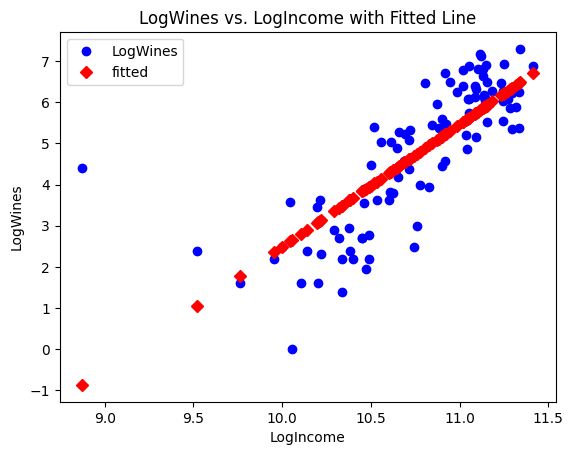

                            OLS Regression Results                            
Dep. Variable:               LogWines   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.17e-22
Time:                        17:08:42   Log-Likelihood:                -145.12
No. Observations:                  99   AIC:                             294.2
Df Residuals:                      97   BIC:                             299.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.3257      2.543    -10.744      0.0

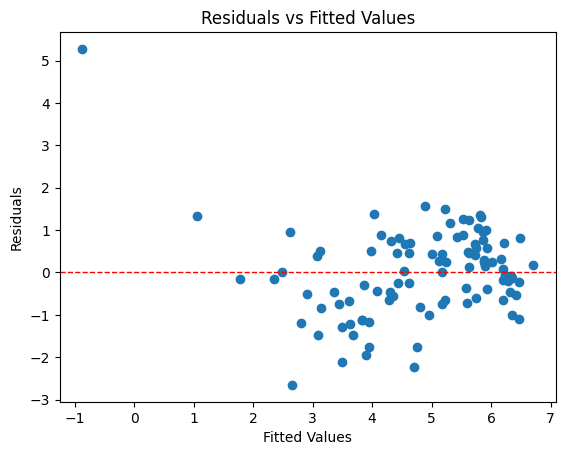

    Variable         VIF
0  Intercept  571.197873
1  LogIncome    1.000000
Breusch-Pagan Test p-value: 7.275275757130443e-07


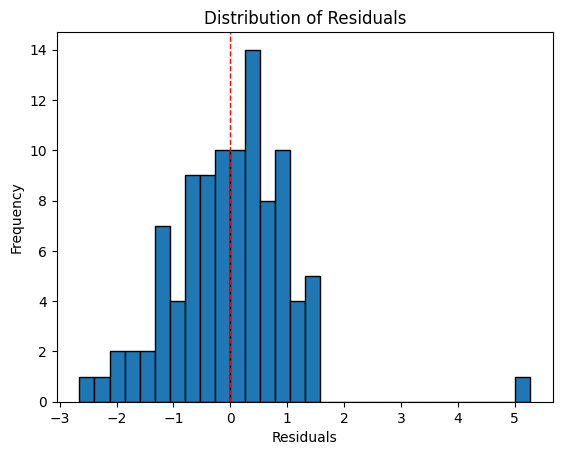

Shapiro-Wilk Test p-value: 3.5735220414094185e-05
Durbin-Watson Statistic: 1.5213796613004464


In [21]:
# Charger le dataset
file_path = 'marketing_campaign.xlsx'
data = pd.read_excel(file_path)

# Échantillonner et nettoyer les données
data_sub = data.sample(100)
data_sub = data_sub.dropna(subset=['MntWines', 'Income'])  # Retirer les valeurs manquantes

# Filtrer les données pour exclure les revenus supérieurs à 100000
data_sub = data_sub[data_sub['Income'] <= 100000]

data_sub['LogIncome'] = np.log(data_sub['Income'])
data_sub['LogWines'] = np.log(data_sub['MntWines'] + 1)  # Add 1 to avoid log(0)

# Créer le modèle de régression avec LogIncome
model_h1 = ols("LogWines ~ LogIncome", data=data_sub).fit()

# Générer le graphe "Y and Fitted vs. X" uniquement
fig = sm.graphics.plot_fit(model_h1, "LogIncome", vlines=False)  # vlines=False pour éviter les lignes verticales

plt.title("LogWines vs. LogIncome with Fitted Line")
plt.xlabel("LogIncome")
plt.ylabel("LogWines")
plt.show()

print(model_h1.summary())

# Describe
data_sub[['MntWines', 'Income']].describe().T

# ----------- OLS Assumption Checks ----------- #

# 1. Linearity: Residuals vs Fitted Plot
plt.scatter(model_h1.fittedvalues, model_h1.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


# Create dataframe with only the independent variable(s)
x_vars = model_h1.model.exog
vif = pd.DataFrame()
vif["Variable"] = ["Intercept", "LogIncome"]
vif["VIF"] = [variance_inflation_factor(x_vars, i) for i in range(x_vars.shape[1])]
print(vif)

# 3. Homoskedasticity: Breusch-Pagan Test
bp_test = het_breuschpagan(model_h1.resid, model_h1.model.exog)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")  # Second value is the p-value

# 4. Zero Conditional Mean: Residuals centered around 0
plt.hist(model_h1.resid, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.show()

# 5. Normality of Residuals: Shapiro-Wilk Test
shapiro_test = shapiro(model_h1.resid)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

# 6. Independence of Errors: Durbin-Watson Test
dw_stat = durbin_watson(model_h1.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")



## H2

                            OLS Regression Results                            
Dep. Variable:               LogWines   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.374
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0578
Time:                        16:47:21   Log-Likelihood:                -188.54
No. Observations:                  98   AIC:                             387.1
Df Residuals:                      93   BIC:                             400.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

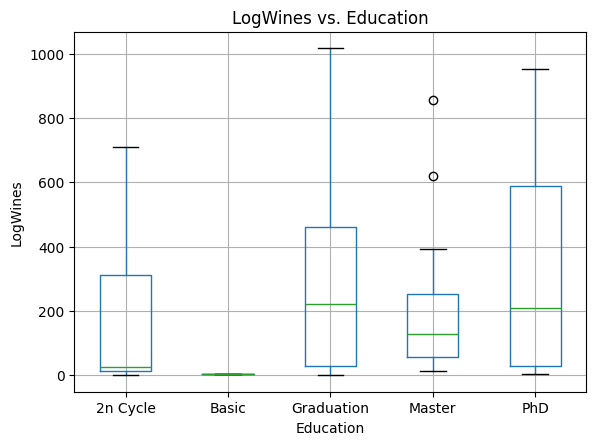

                            OLS Regression Results                            
Dep. Variable:               LogWines   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.374
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0578
Time:                        16:47:22   Log-Likelihood:                -188.54
No. Observations:                  98   AIC:                             387.1
Df Residuals:                      93   BIC:                             400.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

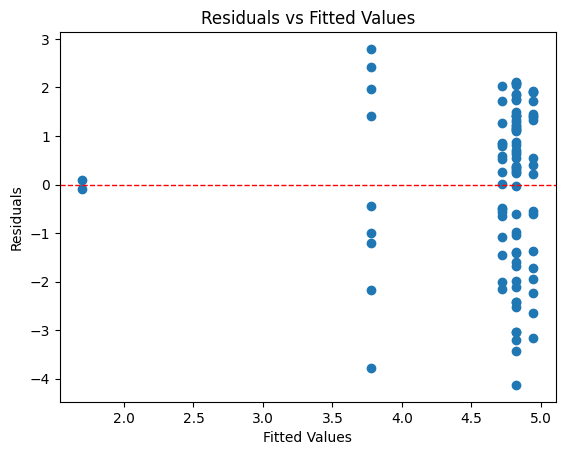

[[1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0.]]
Breusch-Pagan Test p-value: 0.08042693637853336
Shapiro-Wilk Test p-value: 0.00031816835351909455


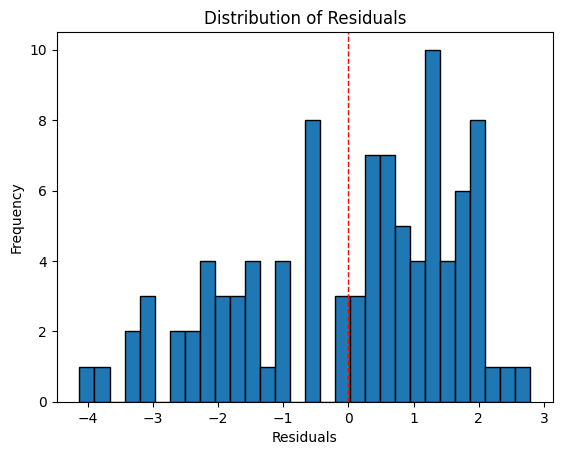

Durbin-Watson Statistic: 1.932448290596193


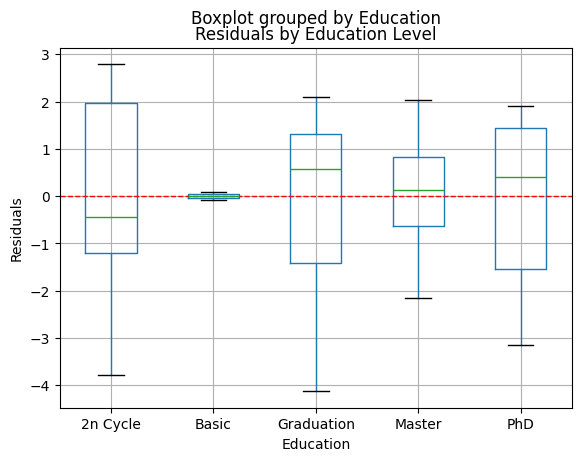

In [17]:
import statsmodels.formula.api as smf 
from statsmodels.graphics.api import plot_regress_exog
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Hypothesis 2: Categorical Variable
model_h2 = smf.ols("LogWines ~ C(Education)", data=data_sub).fit()

print(model_h2.summary())

# Générer le graphe "Y and Fitted vs. X" uniquement
fig, ax = plt.subplots()
data_sub.boxplot(column='MntWines', by='Education', ax=ax)
plt.title("LogWines vs. Education")
plt.suptitle('')  # Suppress the default title
plt.xlabel("Education")
plt.ylabel("LogWines")

# Afficher le graphe
plt.show()

print(model_h2.summary())
data_sub[['LogWines','Education']].describe().T

# ----------- OLS Assumption Checks ----------- #

# 1. Linearity: Residuals vs Fitted Plot
plt.scatter(model_h2.fittedvalues, model_h2.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# 2. No Perfect Multicollinearity: Check Dummy Variables
# Print the dummy variable matrix
print(model_h2.model.exog[:5])

# 3. Homoskedasticity: Breusch-Pagan Test
bp_test = het_breuschpagan(model_h2.resid, model_h2.model.exog)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")  # Second value is the p-value

# 4. Normality of Residuals: Shapiro-Wilk Test
shapiro_test = shapiro(model_h2.resid)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

# Plot the distribution of residuals
plt.hist(model_h2.resid, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.show()

# 5. Independence of Errors: Durbin-Watson Test
dw_stat = durbin_watson(model_h2.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")

# 6. Zero Conditional Mean of Errors: Residuals by Group
fig, ax = plt.subplots()
data_sub['Residuals'] = model_h2.resid
data_sub.boxplot(column='Residuals', by='Education', ax=ax)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals by Education Level")
plt.xlabel("Education")
plt.ylabel("Residuals")
plt.show()


## H3

                            OLS Regression Results                            
Dep. Variable:               LogWines   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     38.95
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.75e-21
Time:                        16:50:34   Log-Likelihood:                -146.16
No. Observations:                 100   AIC:                             304.3
Df Residuals:                      94   BIC:                             320.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

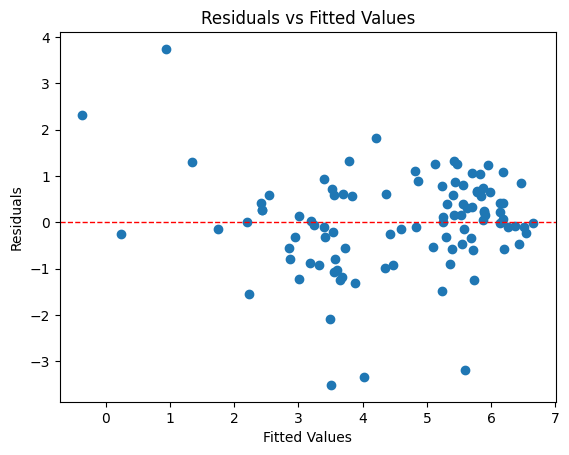

        Variable          VIF
0      Intercept  1037.443583
1      LogIncome   538.916222
2      Kidhome_1  5297.561628
3      Kidhome_2     2.362351
4  Interaction_1   515.925549
5  Interaction_2  5296.421147
Breusch-Pagan Test p-value: 2.2854257691510815e-07
Shapiro-Wilk Test p-value: 0.00021334826697041767


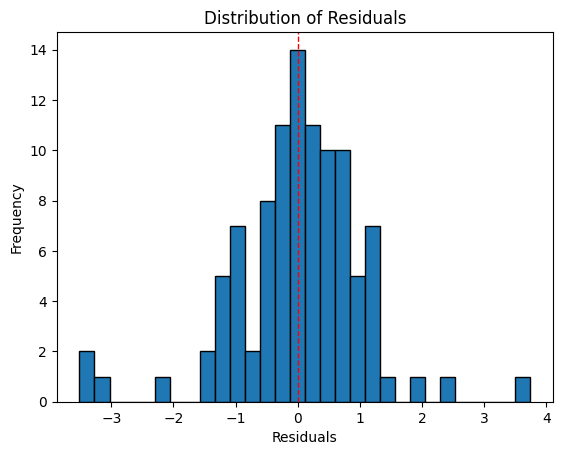

Durbin-Watson Statistic: 1.9278783705168596


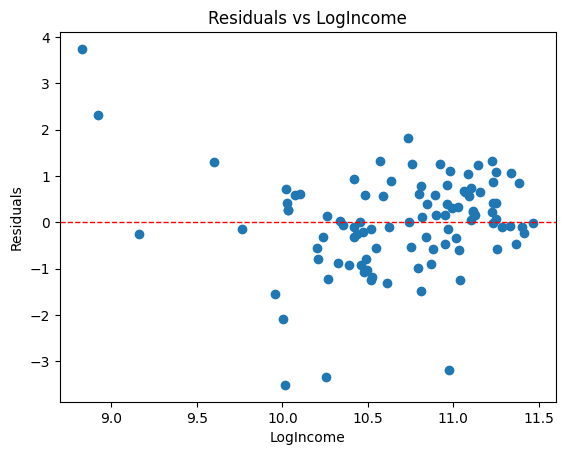

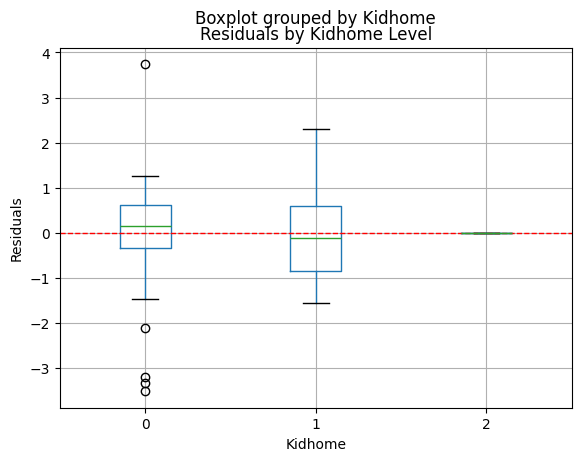

In [19]:
# Charger le dataset
file_path = 'marketing_campaign.xlsx'
data = pd.read_excel(file_path)

# Sample and clean the data
data_sub = data.sample(100)  # Random sample of 100 rows for efficiency
data_sub['Education_numeric'] = data_sub['Education'].astype('category').cat.codes

# Filter data to exclude high-income outliers (> 100,000) and non-positive incomes
data_sub = data_sub[(data_sub['Income'] <= 100000) & (data_sub['Income'] > 0)]
data_sub['LogIncome'] = np.log(data_sub['Income'])
data_sub['LogWines'] = np.log(data_sub['MntWines'] + 1)  # Add 1 to avoid log(0)

# Hypothesis: Moderation Effect
# Interaction term for moderation effect of Kidhome
model_h3 = ols("LogWines ~ LogIncome * C(Kidhome)", data=data_sub).fit()

# Adjust pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Display summary results
print(model_h3.summary())

# ----------- OLS Assumption Checks ----------- #

# 1. Linearity: Residuals vs Fitted Plot
plt.scatter(model_h3.fittedvalues, model_h3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# 2. No Perfect Multicollinearity: Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x_vars = model_h3.model.exog
vif["Variable"] = ["Intercept", "LogIncome", "Kidhome_1", "Kidhome_2", "Interaction_1", "Interaction_2"]
vif["VIF"] = [variance_inflation_factor(x_vars, i) for i in range(x_vars.shape[1])]
print(vif)

# 3. Homoskedasticity: Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_h3.resid, model_h3.model.exog)
print(f"Breusch-Pagan Test p-value: {bp_test[1]}")  # Second value is the p-value

# 4. Normality of Residuals: Shapiro-Wilk Test
from scipy.stats import shapiro
shapiro_test = shapiro(model_h3.resid)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")

# Plot the distribution of residuals
plt.hist(model_h3.resid, bins=30, edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.show()

# 5. Independence of Errors: Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model_h3.resid)
print(f"Durbin-Watson Statistic: {dw_stat}")

# 6. Zero Conditional Mean of Errors: Residuals by Predictor
plt.scatter(data_sub["LogIncome"], model_h3.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs LogIncome")
plt.xlabel("LogIncome")
plt.ylabel("Residuals")
plt.show()

# Residuals by group (Kidhome)
fig, ax = plt.subplots()
data_sub['Residuals'] = model_h3.resid
data_sub.boxplot(column='Residuals', by='Kidhome', ax=ax)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals by Kidhome Level")
plt.xlabel("Kidhome")
plt.ylabel("Residuals")
plt.show()

## BONUS

In [ ]:
# Hypothesis 2: Categorical Variable
model_h2 = smf.ols("MntWines ~ C(Kidhome)", data=data_sub).fit()

print(model_h2.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     17.59
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.23e-07
Time:                        16:41:26   Log-Likelihood:                -683.54
No. Observations:                  97   AIC:                             1373.
Df Residuals:                      94   BIC:                             1381.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         430.4340     38.801     